# Combinatoire du [Puissance 4](https://fr.wikipedia.org/wiki/Puissance_4)
>**Objectif** : Implémentation du jeu + Étude combinatoire du jeu

---

## Membres du binômes
### VU Hoang Thuy Duong
- **Numéro d'étudiante : 21110221**
- Groupe : 1 *(Statistique et Informatique - LU3IN005)*
- Email : vuhoang.thduong@gmail.com
- Autres liens : 
    - [LinkedIn](https://www.linkedin.com/in/meriadocdgv/)
    - [Github](https://github.com/Meriadoc-gitgit)
    
    
### Halimatou DIALLO
- **Numéro d'étudiante : 21114613**
- Groupe : 1 *(Statistique et Informatique - LU3IN005)*
- Email : 
- Autres liens : 
    - [LinkedIn](https://www.linkedin.com/in/diallo-halima/)
    - [Github](https://github.com/limadiallo)
    
    
## Instructeur
### M. Maxime Bouthors
- Adresse mail : bouthors@isir.upmc.fr
---

# Introduction
---

# Modèle basique

## Structures utilisées
### Class `Plateau`
- 1 tableau `self.board` de dimension `self.width`x`self.length` représentant le plateau de jeu
- 2 joueurs `self.player1` et `self.player2` 
- 2 variables enregistrant la dimension du plateau de jeu `self.width` et `self.length`

### Class `Player`
- 1 étiquette `self.etiquette` représentant la couleur possédée par ce joueur
- 1 ensemble de coordonnées `self.coordinate` de chaque tour du joueur

## Fonctions de manipulation
- `show()` : afficher le plateau en cours
- `reset()` : réinitialiser le jeu
- `has_won()` : tester la victoire d'un des deux joueurs 
- `play(x,joueur) : 

In [1]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import necessary classes
from plateau import *
from player import *
from src import *


# Définir les 2 joueurs avec leurs propres étiquettes
# Symbole : 
### 1 pour le premier joueur
### -1 pour le deuxième
Joueur1 = Player(1)
Joueur2 = Player(-1)


# DÉMARRAGE DU JEU 
# Définir le Plateau de Puissance 4 sur laquelle le jeu démarre

# Dimension 8x8
print("PUISSANCE 4 - DIMENSION 8x8")
P = Plateau(8,8,Joueur1,Joueur2)
P.run(Joueur1,Joueur2)
P.show()
print();print()

# Dimension 7x8
print("PUISSANCE 4 - DIMENSION 7x8")
P = Plateau(7,8,Joueur1,Joueur2)
P.run(Joueur1,Joueur2)
P.show()
print();print()

# Dimension 8x9
print("PUISSANCE 4 - DIMENSION 8x9")
P = Plateau(8,9,Joueur1,Joueur2)
P.run(Joueur1,Joueur2)
P.show()

PUISSANCE 4 - DIMENSION 8x8
Current state of the game
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0.  1.  0.  1.  0.]
 [-1. -1.  1.  1.  1.  1. -1.  0.]]


PUISSANCE 4 - DIMENSION 7x8
Current state of the game
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  1. -1.  1.  0.]
 [ 1.  0.  0.  0. -1. -1. -1.  0.]
 [-1.  1.  1. -1.  1. -1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.  1. -1.]]


PUISSANCE 4 - DIMENSION 8x9
Current state of the game
[[ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 1.  1.  0.  0.  1.  0. -1.  0.  1.]
 [-1.  1.  0.  1. -1.  0.  1.  0. -1.]
 [ 1.  1.  0. -1. -1.  0. -1.  0.  1.]
 [-1. -1.  1. -1. -1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1.  1. -1. -1. 

In [ ]:
# Distribution du nombre de coups avant une victoire lorsque les deux joueurs jouent aléatoirement 
# en différenciant selon que ce soit le premier ou le deuxième joueur qui gagne
P = Plateau(15,15,Joueur1, Joueur2)
list_move = []

for i in range(1000) : 
    total_move = 0
    P.run(Joueur1, Joueur2)
    for j in range(P.length) :
        for k in range(P.width) : 
            if P.board[j][k]==P.has_won() : 
                total_move+=1
    list_move.append(total_move)
    P.reset()

---

In [ ]:
list_move_unique = np.unique(list_move)
list_move_unique.sort()
freq_move = dict()

# Construire le dictionnaire de base
for i in range(np.max(list_move_unique)) : 
    if i not freq_move : 
        freq_movep[i] = 0

for i in list_move : 
    freq_move[i] +=1

value = [i for (_,i) in freq_move.items()]
freq = [i for (i,_) in freq_move.items()]

df = {"freq_move" : freq, "value" : value}
pd.DataFrame.from_dict(df)

In [ ]:
df = {'3':0,"2":1}
pd.DataFrame.from_dict(df)

Text(0.5, 1.0, 'Distribution du nombre de coups avant une victoire')

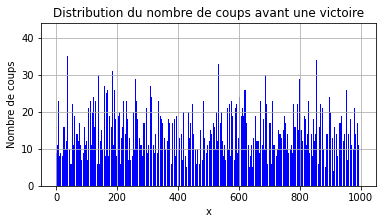

In [64]:
# Graphe de distribution des nombres de déplacements
plt_1 = plt.figure(figsize=(6, 3))
plt.bar(range(1000),list_move,color="blue")
plt.grid()
#plt.scatter(range(150),list_move,s=.5,c="red")
plt.xlabel('x')
plt.ylabel("Nombre de coups")

plt.title("Distribution du nombre de coups avant une victoire")

---

[Loi de Poisson](https://fr.wikipedia.org/wiki/Loi_de_Poisson)